<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/CAP4633C_Assigment1_Spring25_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# CAP 4633C. Spring 2025

##ASSIGNMENT 1

GROUP 1:

#*Martha Martha

#*Aurisabel Fereira

This assignment covers the basic ideas about Classification we have discussed so far in class. It also covers Naive Bayes classification and ClassificationTrees.

Questions 1 and 2 are challenge questions. They are worth only 5 and 15 points, respectively. Challenge questions are those I want you to try your best to answer without getting any help from me (i.e., you cannot ask me how to answer them). If you do something, you will get points for your answers to these questions, even if they are not completely right (i.e., partial credit is your friend!)

Questions 3 and 4 are based on the Cancer dataset part of scikit-learn. To know more about the variables in this dataset, you can visit the following web page:

https://scikit-learn.org/stable/datasets/toy_dataset.html

To read this dataset from scikit-learn, run the following statements in your Colab notebook:

To read this dataset from scikit-learn, run the following statements in your Colab notebook:

In [ ]:
from sklearn import datasets
cancer_data=datasets.load_breast_cancer()
cancer_df=pd.DataFrame(cancer_data.data, columns= cancer_data.feature_names)
original_target= cancer_data.target
new_target= 1 - original_target
cancer_df['Y']= new_target


Now you can use the ‘cancer_df’ data frame to answer questions 3 and 4. In this dataframe, the last column, Y, is the outcome. The other columns are the predictors. __The classes of the outcome variable are 1 for patients with Malignant tumors and 0 for patients with benign tumors. __

#Question 1 (5 points): (include the answer to this question in the notebook too)

We have two piles of product X. The probability that one product selected from pile # 1 is defective is 0.2. The probability that one product selected from pile # 2 is defective is 0.1.

__a)__ We inspect an item that was previously drawn from a pile (we do not know which pile) and we notice it is defective. What is the probability it was selected from pile 2? Show all your work.




Answer:

The probability that one product selected from pile # 1 is defective is 0.2

P (Defective |  Pile 1) = 0.2

The probability that one product selected from pile # 2 is defective is 0.1.

P (Defective |  Pile 2) = 0.1

P(Pile 2 | Defective) = ?

For this we use Bayes' Theorem:

P(A/B) = P(B|A) * P(A) / P(B)

then

P(Pile 2 | Defective) = P (Defective |  Pile 2) * P(Pile 2)
/ P(Defective)

We assume equal probability P(Pile 1) = P(Pile 2) = 0.5

using the law of Total of probability

P(Defective)  = P(Defective|Pile1) * P(Pile1) + P(Defective|Pile2) * Pile 2, substituting values

P(Defective) = (0.2 *0.5) + (0.1 * 0.5) = 0.1 + 0.05 = 0.15

__P(Defective) =  0.15__

 Then

P(Pile 2 | Defective) = P (Defective |  Pile 2) * P(Pile 2)
/ P(Defective) = 0.1 * 0.5 / 0.15 = 0.33

Result

__P(Pile 2 | Defective) =  0.33__


__b)__ Describe with words what these two statements mean:

P (Defective |  Pile 1) = The probability that one product selected from pile # 1 is defective

P (Pile 2 | Non- defective) = We inspect an item that was previously drawn from a pile (we do not know which pile) and we notice it is non-defective. What is the probability it was selected from pile 2

#Question 2 (15 points): (include the answer to this question in the notebook too)

The following figure shows a split done on predictor Xj at a cut off value of a.


__a)__ Manually compute the error rate of the split (show all your work).

The total number of samples in the parent node: 4+ 16 = 20

The majority class is Yes (16 Yes, 4 No),

We know that the Error Rate in anode = proportion of obs that belong to the least frequent class in te node, then:

__Error rate in the Parent Node__ is 4/20 = 0.2

__Error rate in the left child Node__ is 4/11 = 0.36

__Error rate in the right child Node__ is = 0

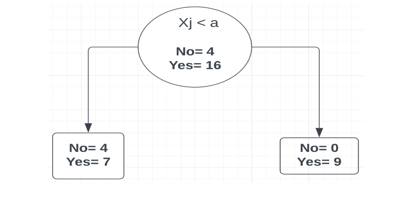

a1) Based on the error rate of the split, decide whether the node should be split into two child nodes or left unsplit. Justify.

We assume that error rate is used as the measure of purity. A split will occur if the combined error rate of the left and right nodes is minimized.

Then we know that the weighted error after the split is

(Number of samples of the left node/Number Samples total * Error Left + (Number of samples of the Right node/Number Samples total * Error Right)= 11/20 * 4/11 + 9/20 * 0 = 0.2

Since the error rate remains unchanged, the split does not enhance classification performance. In this case, it is better __not to split__.


In [ ]:
11/20 * 4/11 + 9/20 * 0

0.2

__b)__ Manually compute the entropy of the split (show all your work).  

Entropy for a split= Weighted Entropy for the split

Weighted Entropy for the split= Weight for left node * Entropy for left node + weight for right node * Entropy for right node

D= - (1-p1) * log (1 -p1) - p1 * log(p1)

The entropy for __Parent Node__ is

P1 = 16/20

D= - (1-p1) * log (1 -p1) - p1 * log(p1)


In [ ]:
(4/20)* np.log(4/20)- (116/20)*np.log(16/20)

0.9723450151355961

= 0.972

for __Left Node__ P1 = 7/11

for __Right Node__ P1 = 9/9

Then we know that the entropy after the split is

__b1)__ Based on the entropy of the split, decide whether the node should be split into two child nodes or left unsplit. Justify.

A lower entropy value indicates a purer node. Since entropy decreased after the split In this case, it is better __split__

In [ ]:
(16/20)* (-(7/11)*np.log(7/11)- (9/9)*np.log(9/9)) + \
(16/20)* (-(9/9)*np.log(9/9) -(7/11)*np.log(7/11))

0.46020303508384014

__b1)__ Based on the entropy of the split (0.46), decide whether the node should be split into two child nodes or left unsplit. Justify.

A lower entropy value indicates a purer node. Since entropy decreased after the split In this case, it is better __split__

#Question 3 (50 points):

Obtain a classification tree to estimate the outcome variable in the Cancer dataset. Use the post-pruning strategy based on cost-complexity pruning via cross-validation.

Consider the following requirements before applying the post-pruning strategy:

You MUST use the exact same steps and code that we learned in class. If you do something differently, your question will be marked wrong with the following message: “Intentionally failed to adhere to instructions”.
Split the data into 80% training and 20% testing.
Use Entropy as the criterion to grow the tree.


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

__a)__ Obtain the tree on the training data and show its figure. Use the figure of the tree to answer these two questions:

From the rightmost leaf in the tree:

Report the number of observations that reached it.
What’s the prediction of Y for the samples that reached it? JUSTIFY how you came up with your prediction.


In [ ]:
# Defining independent variables (X) and dependent variable (y)
X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
# Stratify ensures the target variable distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Define a hyperparameter grid for tuning a decision tree classifier
hyperparam_grid = {
    'criterion': ['entropy'],  # Splitting criteria
    'max_depth': np.arange(2, 7),  # Tree depths from 2 to 6
    'min_samples_split': [0.05, 0.1, 0.15, 0.2],  # Min percentage of samples needed to split a node
    'min_samples_leaf': [0.05, 0.1, 0.15, 0.2],  # Min percentage of samples needed in a leaf node
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.01, 0.05]  # Minimum impurity decrease for a split
}

In [ ]:
# Set up cross-validation with 10 splits, shuffling the data for randomness
cv_set_up = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# Creating an unpruned Decision Tree model using 'gini' criterion
tree_unpruned = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
# Train the unpruned decision tree
tree_unpruned.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
# Extracting cost complexity pruning path to determine optimal alpha for pruning
ccp_path_ch= tree_unpruned.cost_complexity_pruning_path(X_train , y_train)

In [ ]:
# Defining hyperparameter grid for pruning using 'ccp_alpha'
hyperparam_grid_alpha_ch = { 'ccp_alpha': ccp_path_ch.ccp_alphas}

In [ ]:
# Running GridSearchCV to find the best pruning parameter (ccp_alpha)
gridSearch_alpha_ch = GridSearchCV(tree_unpruned, param_grid = hyperparam_grid_alpha_ch,  cv= cv_set_up , scoring='accuracy')


In [ ]:
# Training GridSearchCV to determine the best pruning parameter
gridSearch_alpha_ch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'ccp_alpha': array([0.        , 0.00713212, 0.00995456, 0.00995456, 0.01066979,
       0.01066979, 0.01138587, 0.01262863, 0.01426423, 0.01833523,
       0.02557741, 0.04816423, 0.08031437, 0.09160626, 0.56608836])},
             scoring='accuracy')

In [ ]:
# Creating a post-pruned Decision Tree model using the best 'ccp_alpha'
tree_postpruned= DecisionTreeClassifier( random_state=1, ccp_alpha= gridSearch_alpha_ch.best_params_['ccp_alpha'])

In [ ]:
# Training the post-pruned decision tree model
tree_postpruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02557740823854459, random_state=1)

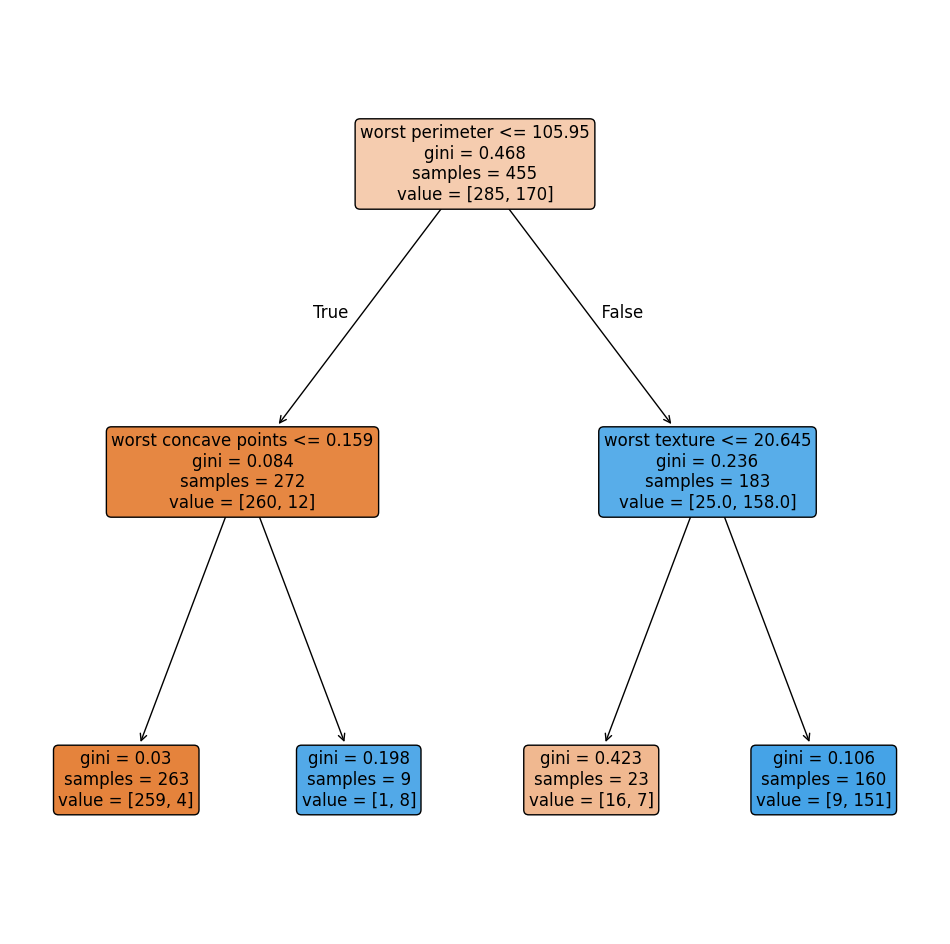

In [ ]:
# Visualizing the post-pruned decision tree
plt.figure(figsize=(12,12))
tree.plot_tree(tree_postpruned,filled=True, rounded= True, feature_names=X_train.columns, fontsize=12)
plt.show()

The numbers of observations for the rightmost leaf in the tree is __160 (Samples)__.

The leaf node shows that 9 samples belong to Class 0 and 151 samples belong to Class 1. Since the majority class is Class 1 (151 > 9), the model predicts __𝑌=1, indicating patients with malignant tumors__.

__b)__ Report the test prediction error rate of the tree that you obtained.

In [ ]:
# Making predictions using the post-pruned decision tree
y_pred_post_pr_tree = tree_postpruned.predict(X_test)

In [ ]:
# Generating confusion matrix for post-pruned model evaluation
confusion_matrix (y_test, y_pred_post_pr_tree)

array([[67,  5],
       [ 6, 36]])

In [ ]:
# Displaying classification report to analyze performance metrics
print (classification_report (y_test, y_pred_post_pr_tree))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



From the classification report, we can calculate the error rate as 1−Accuracy = 1-0.90 = 0.10. Therefore, the test prediction error rate is 10%.

__c)__ If you applied the tree to predict the cancer status of 350 new people that we know to have a malignant tumor, how many of them do you expect the tree to correctly classify? Justify by showing how you got your answer.

We need to use the recall for Class 1 (malignant tumors) from the classification report. Recall represents the proportion of actual positive cases (malignant tumors) that the model correctly identifies. The recall for Class 1 is 0.86, meaning the model correctly classifies 86% of all true malignant tumor cases.

So, for 350 people with malignant tumors, the expected number of correct classifications is:

Correct classifications = 350* 0.86 = 301.

Then, __we expect the treee correctly classify 301 of the 350 people with malignant tumors__.

__d)__ What’s the precision of the tree (in %) for the Malignant class? Explain how you got your answer.

Precision measures the proportion of predicted positive cases that are actually positive. In this case, it represents how many of the predicted malignant tumor cases (Class 1) are actually correct.

Precision for Class 1 (Malignant Tumors) = 0.88, The precision of the tree for the malignant class is 88%. This means that __88%__ of the cases predicted as malignant tumors are actually correct.

__e)__ Report the area under the ROC curve. Show your work.

In [ ]:
# Compute the ROC-AUC score for the pruned decision tree
roc_auc_postpruned = roc_auc_score(y_test, tree_postpruned.predict_proba(X_test)[:, 1])

In [ ]:
# Round and print the ROC-AUC score
np.round(roc_auc_postpruned, 3)

0.921

In [ ]:
# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, threshold = roc_curve(y_test, tree_postpruned.predict_proba(X_test)[:, 1], pos_label='Yes')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


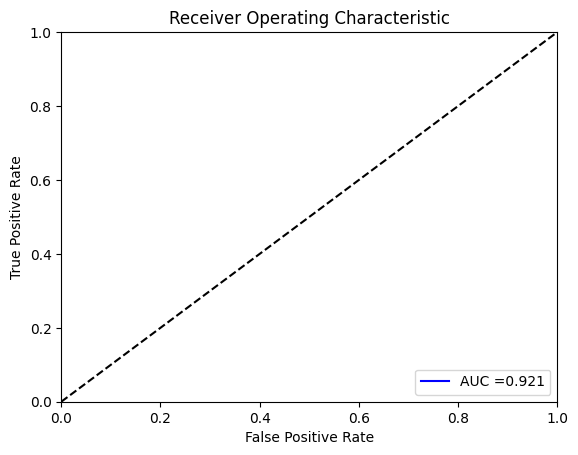

In [ ]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')  # Set plot title
plt.plot(fpr, tpr, 'b', label='AUC =' + str(np.round(roc_auc_postpruned, 3)))  # Plot ROC curve with AUC label
plt.legend(loc='lower right')  # Set legend position
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal reference line
plt.xlim([0, 1])  # Set x-axis limits
plt.ylim([0, 1])  # Set y-axis limits
plt.ylabel('True Positive Rate')  # Label y-axis
plt.xlabel('False Positive Rate')  # Label x-axis
plt.show()  # Display the plot

ROC-AUC measures the model's ability to distinguish between classes.
The closer AUC is to 1, the better the model at separating defaults from non-defaults. In this case the AUC is 0.921. An AUC of 0.921 suggests that the model has excellent discriminative power and is very effective at distinguishing between the two classes (malignant and non-malignant tumors).

#Question 4 (30 points):

Use the same training-test split you used in question 3 to answer this question. Apply Naive Bayes classification.


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Compared to the whole dataset, do the proportions of 'No' and 'Yes' remain similar in the train and test datasets?

y_train.value_counts(normalize=True)

,proportion
Y,
0,0.626374
1,0.373626


In [ ]:
y_test.value_counts(normalize=True)

,proportion
Y,
0,0.631579
1,0.368421


In [ ]:
#creates an instance of the Gaussian Naive Bayes (GaussianNB) classifier using the default settings.
nb_classifier = GaussianNB()


In [ ]:
#Training the Naive Bayes model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Making predictions using the the Naive Bayes model
y_pred_test = nb_classifier.predict(X_test)

__a)__ Report the area under the ROC curve. Show your work. Use this metric to compare the Naive Bayes classifier with the Tree from question 3. Justify your answer (i.e., justify your comparison).

In [ ]:
#AUC and ROC curve

roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])


In [ ]:
# Area under the ROC curve

np.round (roc_auc_nb, 3)

0.99

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


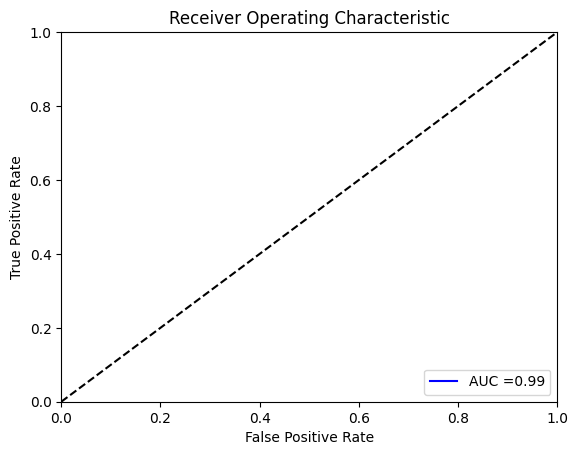

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1], pos_label='Yes')

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC ='+ str (np.round (roc_auc_nb, 3)))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The __AUC for Naive Bayes Model is 0.99__ (almost perfect). Since Naive Bayes (AUC = 0.99) is higher than Post prunning decision Tree (AUC=0.92), __Nayve Bayes performs better in distinguishing between malignant and non-malignant cases__.

__b)__ Report the value of a metric (i.e, ONE metric only) that combines information about the Precision and Sensitivity of the classifier relative to the Malignant class. Of course, do NOT only report the value of the metric but also the name of the metric.

In [ ]:
# Displaying classification report to analyze performance metrics
print (classification_report (y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



 The metric that combines information about the Precision and Sensitivity of the classifier relative to the Malignant class is __f1-score__ and in this case __F1-score for Class 1 (Malignant Class) = 0.95__.

__c)__ If you applied this classifier to predict the cancer status of 400 new people, how many of them do you expect the classifier to classify incorrectly? Justify by showing your work.

To estimate how many of the 400 new people the classifier might misclassify, we use the error rate, calculated as Error rate = 1- accuracy, then 1-0.96 = 0.04 (4%). Applying this to 400 people: 400*0.04 = 16. So, the classifier is expected to misclassify __16 out of 400 new people__.